# SwinIR Online Demo on Real-World Image SR for comparison with BSRGAN (ICCV2021) and Real-ESRGAN

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2108.10257)
[![GitHub Stars](https://img.shields.io/github/stars/JingyunLiang/SwinIR?style=social)](https://github.com/JingyunLiang/SwinIR)
[![download](https://img.shields.io/github/downloads/JingyunLiang/SwinIR/total.svg)](https://github.com/JingyunLiang/SwinIR/releases)

This is a **SwinIR online demo on Real-World Image SR** of our paper [''SwinIR: Image Restoration Using Swin Transformer''](https://arxiv.org/abs/2108.10257).

SwinIR achieves state-of-the-art performance on six tasks: image super-resolution (including classical, lightweight and real-world image super-resolution), image denoising (including grayscale and color image denoising) and JPEG compression artifact reduction. See our [paper](https://arxiv.org/abs/2108.10257) and [project page](https://github.com/JingyunLiang/SwinIR) for detailed results. In particular, we train the real-world image SR model by using **the first practical degradation model [BSRGAN, ICCV2021](https://github.com/cszn/BSRGAN)**. We also refer to a recent model [Real-ESRGAN](https://arxiv.org/abs/2107.10833) for better loss function.

<img src="https://raw.githubusercontent.com/JingyunLiang/SwinIR/main/figs/real_world_image_sr.png" width="100%">



# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU
* Broswer != Firefox (cannot upload images in step 2)

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
!wget https://github.com/JingyunLiang/SwinIR/archive/refs/heads/main.zip
# !git clone https://github.com/JingyunLiang/SwinIR.git
!pip install timm

!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth -P experiments/pretrained_models

--2025-04-29 15:32:55--  https://github.com/JingyunLiang/SwinIR/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/JingyunLiang/SwinIR/zip/refs/heads/main [following]
--2025-04-29 15:32:55--  https://codeload.github.com/JingyunLiang/SwinIR/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [       <=>          ]  29.91M  23.2MB/s    in 1.3s    

2025-04-29 15:32:56 (23.2 MB/s) - ‘main.zip’ saved [31361028]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664

In [2]:
!unzip -q main.zip -d .

In [3]:
!wget https://github.com/JingyunLiang/SwinIR/blob/6545850fbf8df298df73d81f3e8cba638787c8bd/main_test_swinir.py

--2025-04-29 14:38:48--  https://github.com/JingyunLiang/SwinIR/blob/6545850fbf8df298df73d81f3e8cba638787c8bd/main_test_swinir.py
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘main_test_swinir.py’

main_test_swinir.py     [ <=>                ] 431.31K  --.-KB/s    in 0.03s   

2025-04-29 14:38:48 (12.8 MB/s) - ‘main_test_swinir.py’ saved [441661]



# 2. Upload Images

Upload the images to be processed by SwinIR

In [4]:
DEST_DIR="/kaggle/working/SwinIR-main/testsets/samples"

!mkdir -p "$DEST_DIR"

!cp /kaggle/input/satellite-imagery-lahore-dha-phase-6/images/exported_grid_137.png "$DEST_DIR"

<h3>Resizing Images to reduce size</h3>

exported_grid_137.png: Original size = (1476, 1476), New size = (512, 512)


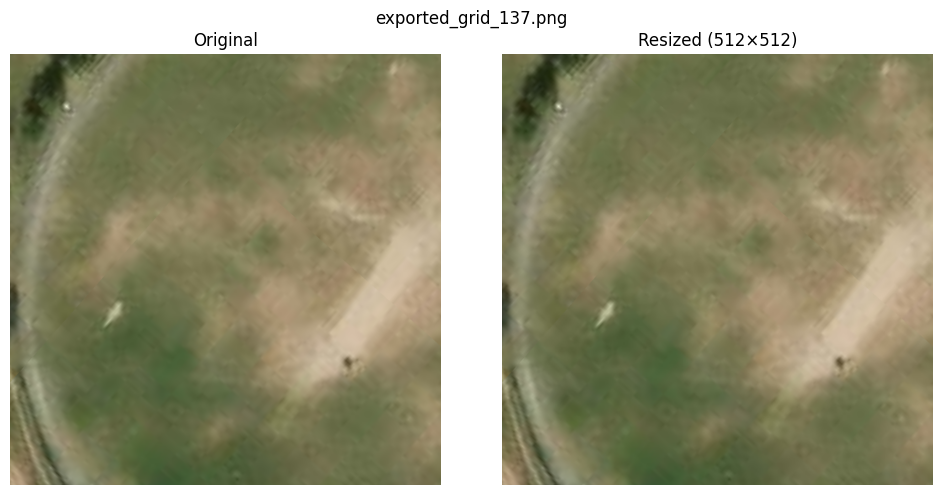

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

img_dir = "/kaggle/working/SwinIR-main/testsets/samples"
output_dir = "/kaggle/working/SwinIR-main/testsets/samples_resized"

!mkdir /kaggle/working/SwinIR-main/testsets/samples_resized

for fname in os.listdir(img_dir):
    if fname.lower().endswith(".png"):
        img_path = os.path.join(img_dir, fname)
        output_path = os.path.join(output_dir, fname)
        original_img = Image.open(img_path)
        original_size = original_img.size

        resized_img = original_img.resize((512, 512), Image.LANCZOS)
        resized_img.save(output_path)

        print(f"{fname}: Original size = {original_size}, New size = {resized_img.size}")

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(original_img)
        axes[0].set_title("Original")
        axes[0].axis("off")
        
        axes[1].imshow(resized_img)
        axes[1].set_title("Resized (512×512)")
        axes[1].axis("off")
        
        plt.suptitle(fname)
        plt.tight_layout()
        plt.show()


# 3. Inference


In [6]:
import os
import shutil
import glob

test_patch_wise = False

result_folder = '/kaggle/working/SwinIR-main/results'
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(result_folder)

if test_patch_wise:
    !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq SwinIR/testsets/RealSRSet --scale 4 --tile 800
else:
    !python /kaggle/working/SwinIR-main/main_test_swinir.py --task real_sr --model_path /kaggle/working/experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq /kaggle/working/SwinIR-main/testsets/samples_resized --scale 4


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
loading model from /kaggle/working/experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/kaggle/working/SwinIR-main/main_test_swinir.py:189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling

# 4. Visualization

Original size: (512, 512), SwinIR Output size: (2048, 2048)


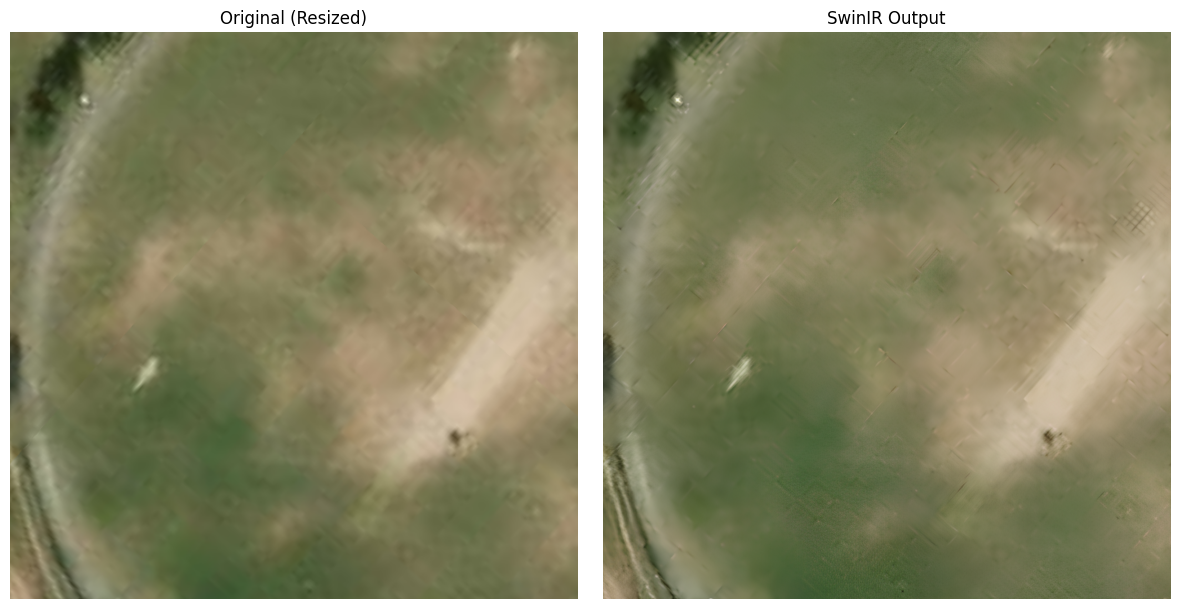

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

original_path = "/kaggle/working/SwinIR-main/testsets/samples_resized/exported_grid_137.png"
result_path = "/kaggle/working/results/swinir_real_sr_x4/exported_grid_137_SwinIR.png"

original = Image.open(original_path).convert("RGB")
result = Image.open(result_path).convert("RGB")

print(f"Original size: {original.size}, SwinIR Output size: {result.size}")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original)
axes[0].set_title("Original (Resized)")
axes[0].axis("off")

axes[1].imshow(result)
axes[1].set_title("SwinIR Output")
axes[1].axis("off")

plt.tight_layout()
plt.show()


<h3>Comparing Raw Swin Ouput Image and Resized (512 * 512) Version of it</h3>

SwinIR Output Size: (2048, 2048)
Resized Output Size: (512, 512)


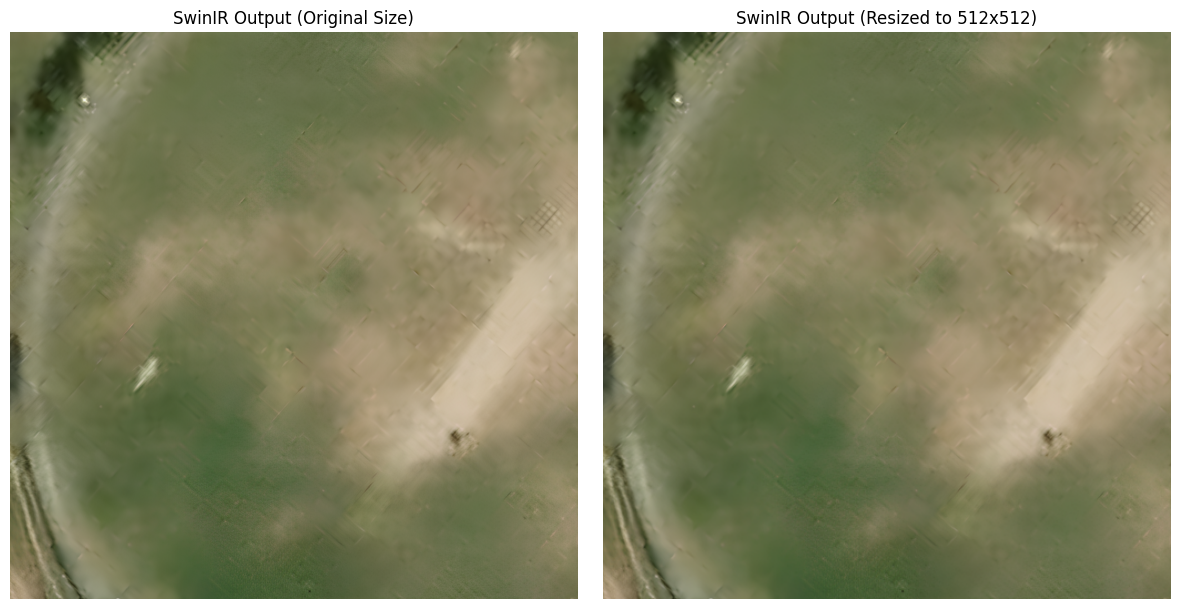

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Load SwinIR output
swinir_path = "/kaggle/working/results/swinir_real_sr_x4/exported_grid_137_SwinIR.png"
swinir_img = Image.open(swinir_path).convert("RGB")

# Resize to 512x512
swinir_resized = swinir_img.resize((512, 512), resample=Image.BICUBIC)

# Print original and resized sizes
print(f"SwinIR Output Size: {swinir_img.size}")
print(f"Resized Output Size: {swinir_resized.size}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(swinir_img)
axes[0].set_title("SwinIR Output (Original Size)")
axes[0].axis("off")

axes[1].imshow(swinir_resized)
axes[1].set_title("SwinIR Output (Resized to 512x512)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


<h1>Iterative Upsampling Using SwinIR</h1>

In [7]:
import os
import shutil
import random
from PIL import Image
import subprocess
from tqdm import tqdm


original_dataset = "/kaggle/input/satellite-imagery-lahore-dha-phase-6/images"
working_dir = "/kaggle/working"
resized_dir = os.path.join(working_dir, "resized_input")
samples_dir = os.path.join(working_dir, "SwinIR-main/testsets/samples_resized")
output_dir = os.path.join(working_dir, "results/swinir_real_sr_x4")
output_after_2 = os.path.join(working_dir, "output_after_2")
output_after_4 = os.path.join(working_dir, "output_after_4")


os.makedirs(resized_dir, exist_ok=True)
os.makedirs(samples_dir, exist_ok=True)
os.makedirs(output_after_2, exist_ok=True)
os.makedirs(output_after_4, exist_ok=True)


image_filenames = [fname for fname in os.listdir(original_dataset) if fname.endswith(".png")]
random.shuffle(image_filenames)
image_filenames = image_filenames[:5]

print("🔧 Resizing original images to 512x512...")

for fname in tqdm(image_filenames):
    img = Image.open(os.path.join(original_dataset, fname)).convert("RGB")
    img_resized = img.resize((512, 512))
    img_resized.save(os.path.join(resized_dir, fname))

for i in range(1, 5):
    print(f"\n🚀 Inference iteration {i}/4")

    if os.path.exists(samples_dir):
        shutil.rmtree(samples_dir)
    os.makedirs(samples_dir)

    for fname in tqdm(os.listdir(resized_dir), desc="Copying images"):
        shutil.copy(os.path.join(resized_dir, fname), os.path.join(samples_dir, fname))

    subprocess.run([
        "python", "/kaggle/working/SwinIR-main/main_test_swinir.py",
        "--task", "real_sr",
        "--model_path", "/kaggle/working/experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth",
        "--folder_lq", samples_dir,
        "--scale", "4"
    ])

    for fname in tqdm(os.listdir(output_dir), desc="Processing outputs"):
        if fname.endswith(".png"):
            out_path = os.path.join(output_dir, fname)
            img = Image.open(out_path).resize((512, 512))
            img.save(os.path.join(resized_dir, fname))

            if i == 2:
                img.save(os.path.join(output_after_2, fname))
            elif i == 4:
                img.save(os.path.join(output_after_4, fname))

print("\n✅ Done: Saved enhanced images after 2nd and 4th inference rounds.")


🔧 Resizing original images to 512x512...


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]



🚀 Inference iteration 1/4


Copying images: 100%|██████████| 5/5 [00:00<00:00, 1740.23it/s]
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/kaggle/working/SwinIR-main/main_test_swinir.py:189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/mai

loading model from /kaggle/working/experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
Testing 0 exported_grid_146   
Testing 1 exported_grid_158   
Testing 2 exported_grid_181   
Testing 3 exported_grid_20    
Testing 4 exported_grid_41    


Processing outputs: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]



🚀 Inference iteration 2/4


Copying images: 100%|██████████| 10/10 [00:00<00:00, 1776.57it/s]
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/kaggle/working/SwinIR-main/main_test_swinir.py:189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/m

loading model from /kaggle/working/experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
Testing 0 exported_grid_146   
Testing 1 exported_grid_146_SwinIR
Testing 2 exported_grid_158   
Testing 3 exported_grid_158_SwinIR
Testing 4 exported_grid_181   
Testing 5 exported_grid_181_SwinIR
Testing 6 exported_grid_20    
Testing 7 exported_grid_20_SwinIR
Testing 8 exported_grid_41    
Testing 9 exported_grid_41_SwinIR


Processing outputs: 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]



🚀 Inference iteration 3/4


Copying images: 100%|██████████| 15/15 [00:00<00:00, 1813.47it/s]
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/kaggle/working/SwinIR-main/main_test_swinir.py:189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/m

loading model from /kaggle/working/experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
Testing 0 exported_grid_146   
Testing 1 exported_grid_146_SwinIR
Testing 2 exported_grid_146_SwinIR_SwinIR
Testing 3 exported_grid_158   
Testing 4 exported_grid_158_SwinIR
Testing 5 exported_grid_158_SwinIR_SwinIR
Testing 6 exported_grid_181   
Testing 7 exported_grid_181_SwinIR
Testing 8 exported_grid_181_SwinIR_SwinIR
Testing 9 exported_grid_20    
Testing 10 exported_grid_20_SwinIR
Testing 11 exported_grid_20_SwinIR_SwinIR
Testing 12 exported_grid_41    
Testing 13 exported_grid_41_SwinIR
Testing 14 exported_grid_41_SwinIR_SwinIR


Processing outputs: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]



🚀 Inference iteration 4/4


Copying images: 100%|██████████| 20/20 [00:00<00:00, 2187.04it/s]
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/kaggle/working/SwinIR-main/main_test_swinir.py:189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/m

loading model from /kaggle/working/experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
Testing 0 exported_grid_146   
Testing 1 exported_grid_146_SwinIR
Testing 2 exported_grid_146_SwinIR_SwinIR
Testing 3 exported_grid_146_SwinIR_SwinIR_SwinIR
Testing 4 exported_grid_158   
Testing 5 exported_grid_158_SwinIR
Testing 6 exported_grid_158_SwinIR_SwinIR
Testing 7 exported_grid_158_SwinIR_SwinIR_SwinIR
Testing 8 exported_grid_181   
Testing 9 exported_grid_181_SwinIR
Testing 10 exported_grid_181_SwinIR_SwinIR
Testing 11 exported_grid_181_SwinIR_SwinIR_SwinIR
Testing 12 exported_grid_20    
Testing 13 exported_grid_20_SwinIR
Testing 14 exported_grid_20_SwinIR_SwinIR
Testing 15 exported_grid_20_SwinIR_SwinIR_SwinIR
Testing 16 exported_grid_41    
Testing 17 exported_grid_41_SwinIR
Testing 18 exported_grid_41_SwinIR_SwinIR
Testing 19 exported_grid_41_SwinIR_SwinIR_SwinIR


Processing outputs: 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]


✅ Done: Saved enhanced images after 2nd and 4th inference rounds.


In [9]:
import shutil


folder_to_zip = '/kaggle/working/output_after_4'  # Replace with your folder name
zip_file_path = '/kaggle/working/output_after_4.zip'  # Path where the zip file will be saved

shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder successfully zipped to: {zip_file_path}")

Folder successfully zipped to: /kaggle/working/output_after_4.zip
